### Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Problem 1

<img src = "1.jpg">

#### Problem 1.2

In [43]:
final_t = 10
dt = 0.01
x_n = 2 # value for x_0
num_sim = 10_000 #Total number of Monte-Carlo Simulations

T = list(np.arange(dt, final_t, dt)) #list or time steps to observe value on, we start with dt, since we are prefilling with x_0 already.

sim_mat = np.empty((num_sim,len(T)+1),dtype = 'float32') # Matrix to store each of 10K simulated processes

sim_mat[:, 0] = x_n #Settign initial x_0 for every simulation i.e value at t = 0
sim_mat[:,0], sim_mat.shape

(array([2., 2., 2., ..., 2., 2., 2.], dtype=float32), (10000, 1000))

In [44]:
# # Simulating each individual processes for dt time steps till final_t
# %time
# for sim in sim_mat:
#     for i in range(1,len(T)+1):
#         # x_n+1 = x_n - x_n*dt + np.sqrt(2*dt)*np.random.randn()
#         x_n_1 = x_n - x_n * dt + np.sqrt(2*dt)*np.random.randn()

#         # Changing x_n t0 x_n+1 for next iteration
#         x_n = x_n_1

#         sim[i] = x_n # Storing the next value of the process in the current simulation

In [45]:
# Simulating each individual process for dt time steps till final_t
for i in range(1,len(T)+1):
    # Getting the new x_n+1 for all simulations at time n, by utilizing the values of x at time n-1 basically following the equation
    # x_n+1 = x_n - x_n*dt + np.sqrt(2*dt)*np.random.randn()
    x_n_1 = sim_mat[:, i-1] - sim_mat[:, i-1] * dt + np.sqrt(2*dt) * np.random.randn(num_sim)
    
    # Setting the columns at nth time step with the obtained value
    sim_mat[:, i] = x_n_1

In [86]:
def hist_plt(time_points, sim_mat, bins, alp: float):
    num_plots = len(time_points)
    num_rows = int(np.ceil(np.sqrt(num_plots)))
    num_cols = int(np.ceil(num_plots / num_rows))
    
    # Get a colormap
    cmap = plt.get_cmap('tab10')
    
    # Get the corresponding colors from the colormap
    colors = [cmap(i % 10) for i in range(len(time_points))]
    
    # Iterate over the time points and plot histograms
    fig, axs = plt.subplots(num_rows, num_cols,figsize = (20,18))
    axs = axs.ravel()
    for i, t in enumerate(time_points):
        # Get the corresponding index in T
        t_index = int(t / dt)
        # Extract the values at the given time point
        if t_index > 0:
            values = sim_mat[:, t_index - 1]
        else:
            values = sim_mat[:, t_index]
    
        # Plot histogram with the random color
        sns.histplot(values, bins=bins, kde=True, alpha=alp, label=f't = {t}', color=colors[i], ax=axs[i])
    
        # Add labels and legend
        axs[i].set(xlabel='Value', ylabel='Frequency')
        axs[i].legend()
    
    # Plot the normal distribution
    samples = np.random.randn(10000)
    i = len(time_points)
    sns.histplot(samples, bins=bins, kde=True, alpha=alp, label='Normal Distribution', color=cmap(i), ax=axs[i])
    axs[i].set(ylabel='Frequency')
    axs[i].legend()
    
    plt.tight_layout()
    plt.show()


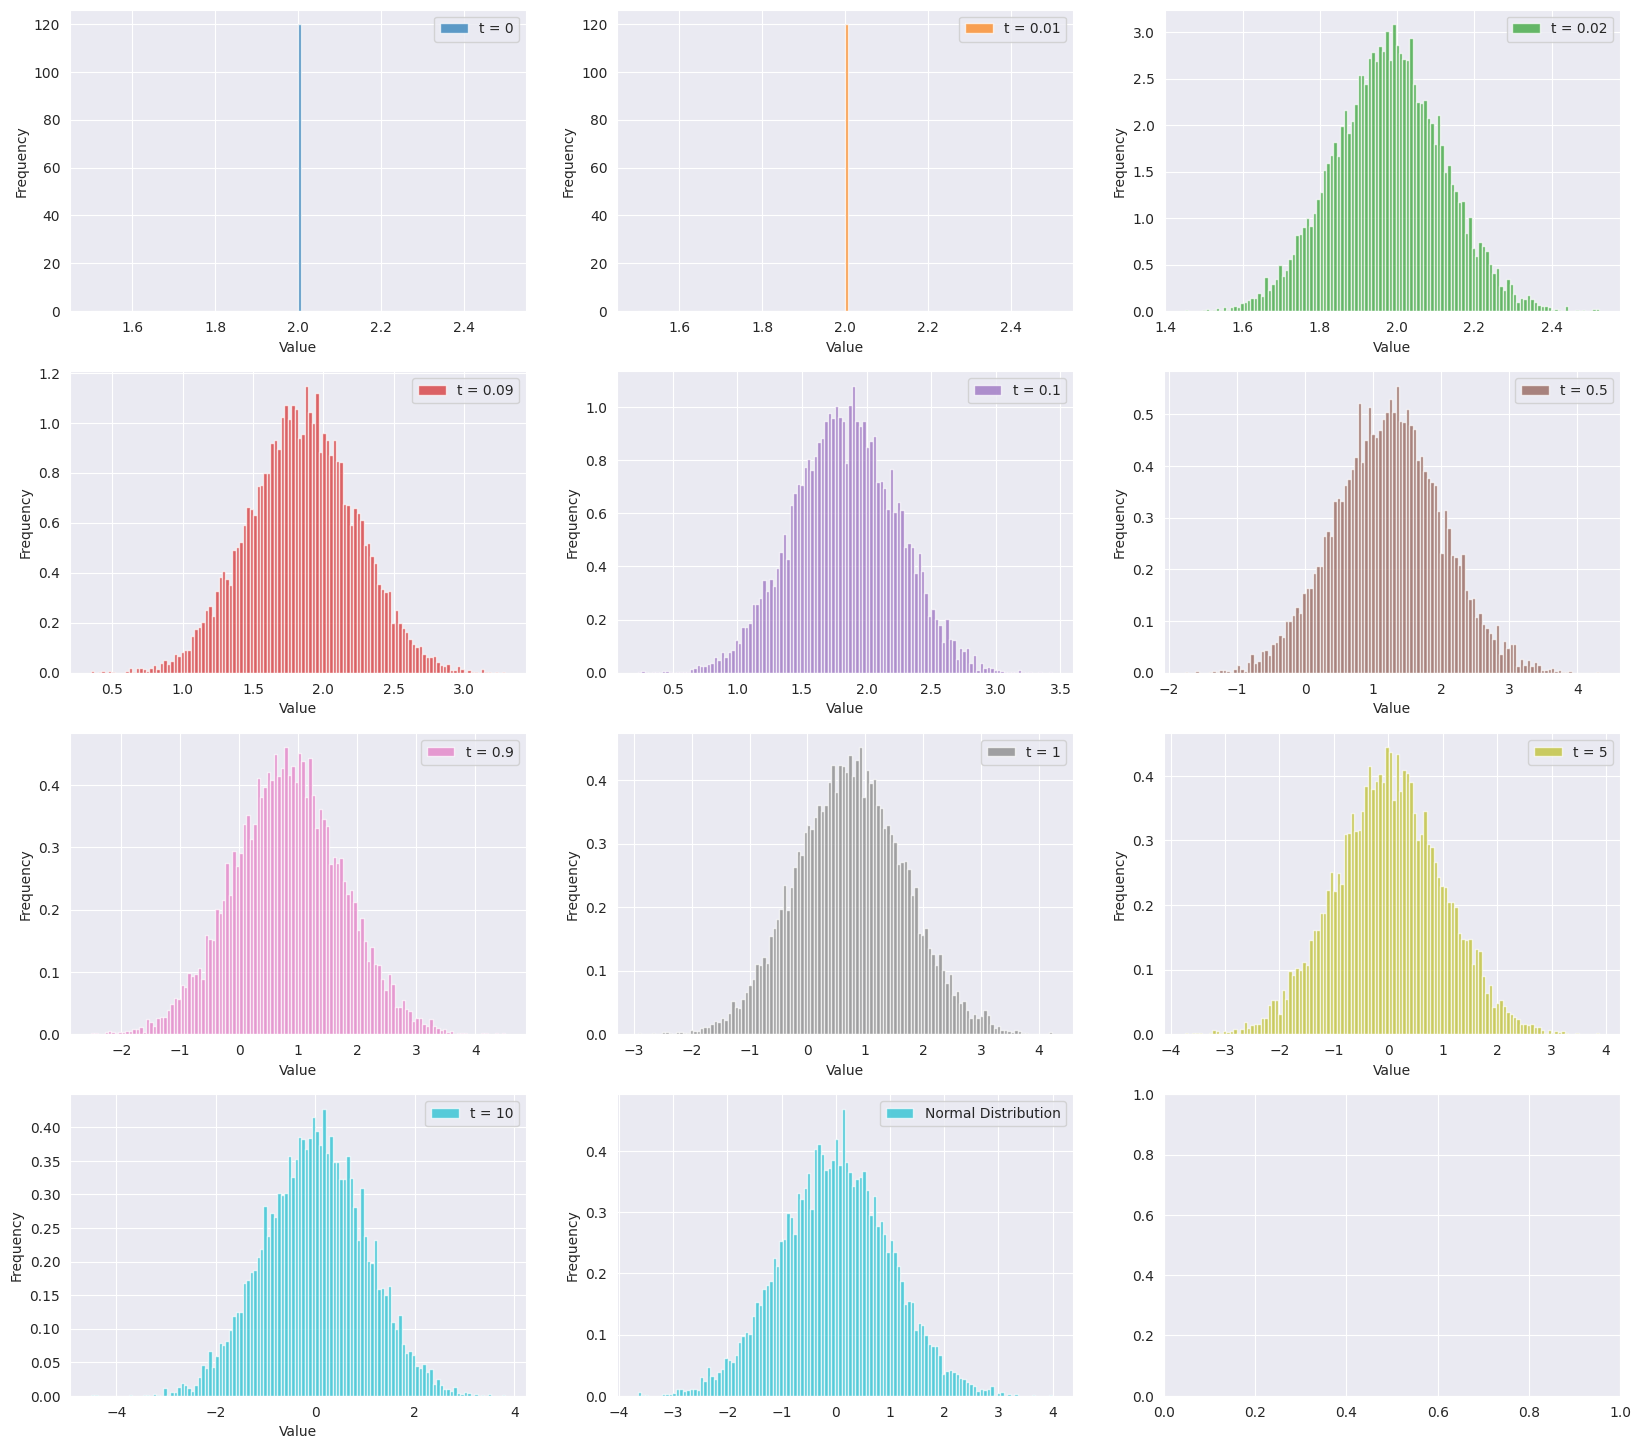

In [47]:
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10]
hist_plt(time_points, sim_mat,'tab10', alpha = 0.5)

#### Problem 1.3

- The distribution looks like normal distribution 
- Distribution over time converge to a normal distribution with mean as 0 and variance 1, since it's most of the support is seen to be inside the values of -2.75 and 2.75

#### Problem 1.4

- The Ornstein-Uhlenbeck process is a stochastic process that describes the evolution of a particle undergoing Brownian motion with a mean-reverting behavior.
- In the equation $x_{n+1} = x_n - x_n*∆t + \sqrt{2∆t}*\xi_n$, the term $x_n - x_n*∆t$ represents the mean-reverting component, while the term $\sqrt{2∆t}$ $\xi_n$ represents the random fluctuation or noise.
- If we could run this process reverse-in-time, it would allow us to generate samples from a distribution that converges to the distribution observed in step 3.
- Specifically, starting from the distribution at time t = 10, we could simulate the process backward to obtain samples from the distribution at earlier times, such as t = 1, t = 0.5, and t = 0 . This reverse simulation can be useful in various scenarios.
- For example, if we have observed the final distribution at a particular time and want to understand how the system evolved over time to reach that distribution, we can use the reverse-in-time simulation to trace back the possible paths and distributions at earlier times.
- In summary, running the Ornstein-Uhlenbeck process reverse-in-time allows we to obtain samples from the distributions observed at earlier times, providing insights into the dynamics and evolution of the system.

In [8]:
final_t = 10
dt = 0.01
num_sim = 10_000 # Total number of Monte-Carlo Simulations

T = list(np.arange(dt, final_t, dt)) # List of time steps to observe value on, we start with dt since we are prefilling with x_0 already.

sim_mat_rev = np.empty((num_sim, len(T) + 1), dtype='float32') # Matrix to store each of the 10K simulated processes

sim_mat_rev[:, -1] = sim_mat[:,-1] # Setting the final x_N for every simulation i.e., value at t = final_t
sim_mat_rev[:, -1], sim_mat_rev.shape

(array([ 0.56067014,  0.40261805, -0.02505913, ..., -0.48155227,
        -0.47267905,  0.49969214], dtype=float32),
 (10000, 1000))

In [9]:
# Simulating each individual process in reverse time for dt time steps till final_t
for i in range(len(T), 0, -1):
    # Getting the new x_n-1 for all simulations at time n, by utilizing the values of x at time n
    # x_n-1 = (x_n - np.sqrt(2*dt)*np.random.randn()) / (1 - dt)
    x_n_1 = (sim_mat_rev[:, i] - np.sqrt(2 * dt) * np.random.randn(num_sim)) / (1 - dt)

    # Setting the columns at nth time step with the obtained value
    sim_mat_rev[:, i - 1] = x_n_1

In [10]:
sim_mat_rev[:, 0], sim_mat_rev.shape

(array([-21334.19  ,   1668.6377,   3692.0305, ...,  10475.773 ,
        -53515.777 ,  21952.89  ], dtype=float32),
 (10000, 1000))

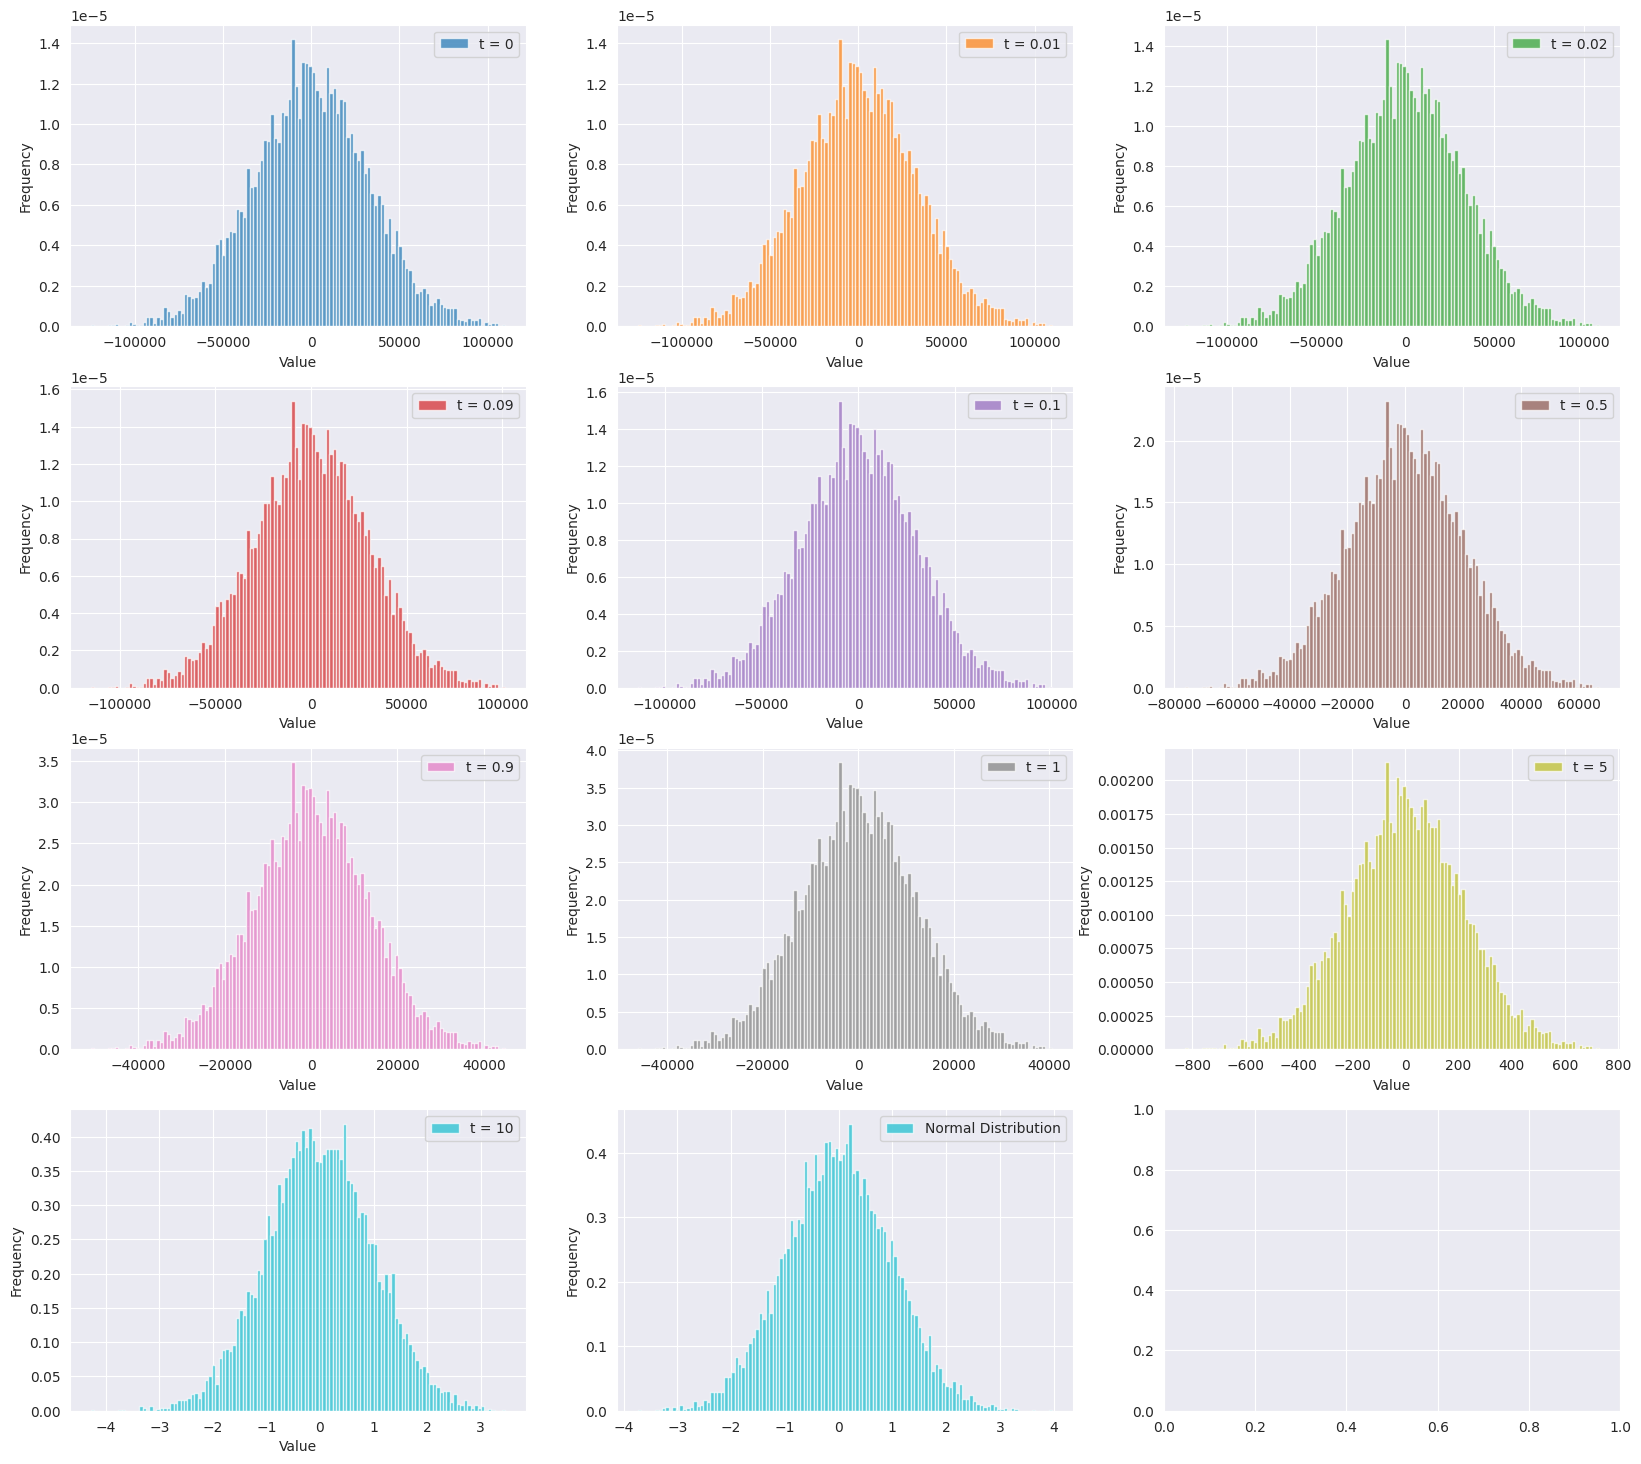

In [11]:
hist_plt(time_points, sim_mat_rev,'tab10', alpha = 0.5)

### Problem 2

<img src = "2.1.jpg">

<img src = "2.2.jpg">

#### Problem 2.1

In [61]:
dt = 0.01
T = 5
X = np.arange(0, T + dt, dt)
C = 1

def pi(x, C):
    val = ((x - 4) ** 2 - 2) ** 2
    prob = (1 / C) * np.exp(-1 * val)
    return prob

# Vectorized calculation
Y = pi(X, C)

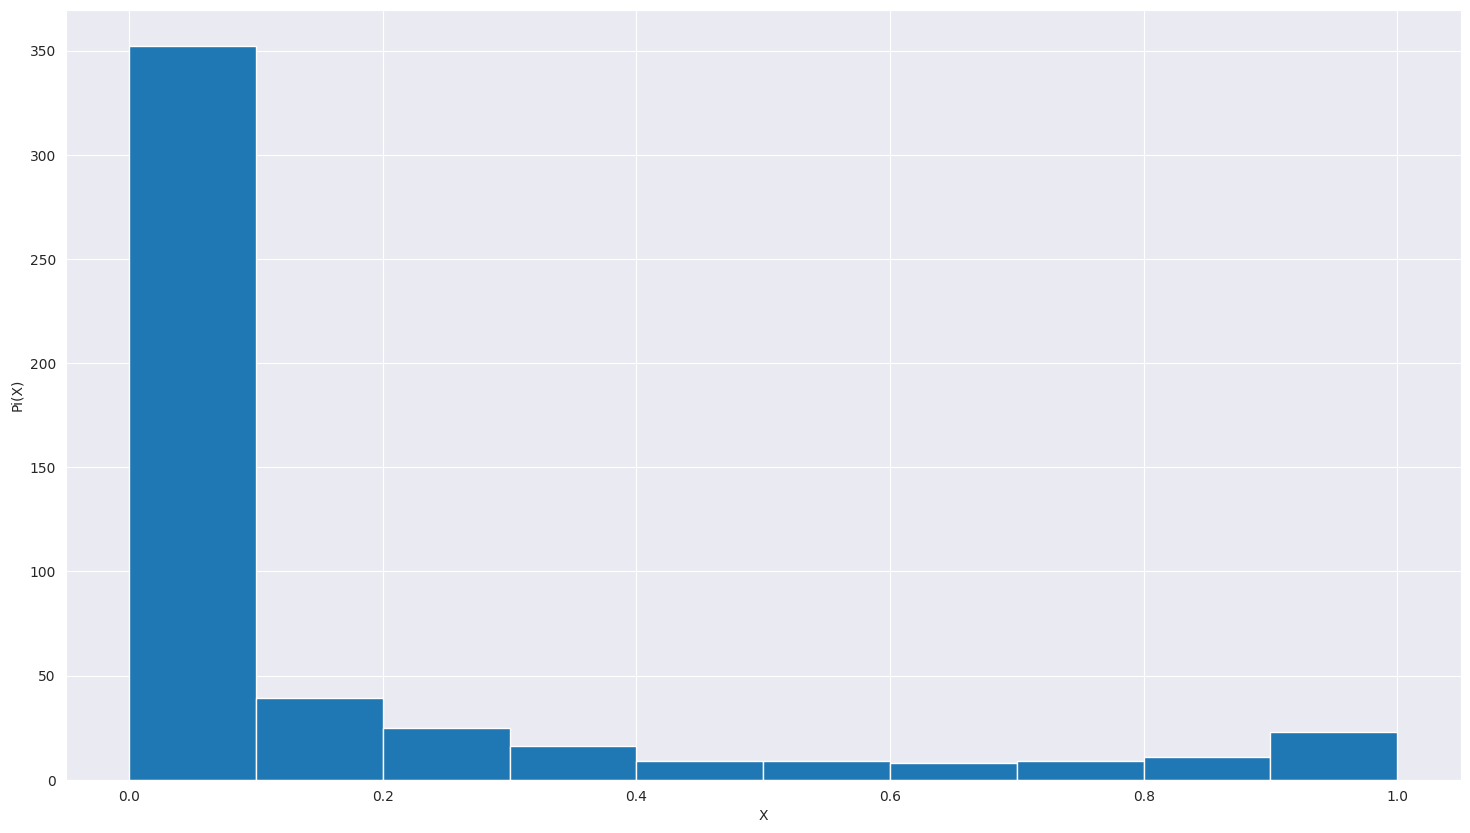

In [62]:
plt.figure(figsize = (18,10))
plt.xlabel("X")
plt.ylabel("Pi(X)")
plt.hist(Y)
plt.show()

#### Problem 2.2

In [49]:
final_t = 100
dt = 0.01
x_n = 1 # value for x_0
num_sim = 10_000 #Total number of Monte-Carlo Simulations

T = list(np.arange(dt, final_t, dt)) #list or time steps to observe value on, we start with dt, since we are prefilling with x_0 already.

sim_mat = np.empty((num_sim,len(T)+1),dtype = 'float32') # Matrix to store each of 10K simulated processes

sim_mat[:, 0] = x_n #Settign initial x_0 for every simulation i.e value at t = 0
sim_mat[:,0], sim_mat.shape

(array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), (10000, 10000))

In [50]:
# Simulating each individual process for dt time steps till final_t
vals = sim_mat[:, 0]  # Initial values

for i in range(1, len(T) + 1):
    # Compute val_tr for all simulations
    val_tr = (4 * (vals - 4) ** 3 - 8 * (vals - 4)) * dt
    
    # Generate all random numbers for this iteration
    random_nums = np.sqrt(2 * dt) * np.random.randn(num_sim)
    
    # Compute the new values for all simulations at once
    x_n_1 = vals - val_tr + random_nums
    
    # Update vals with the new values for the next iteration
    vals = x_n_1
    
    # Setting the columns at nth time step with the obtained value
    sim_mat[:, i] = x_n_1

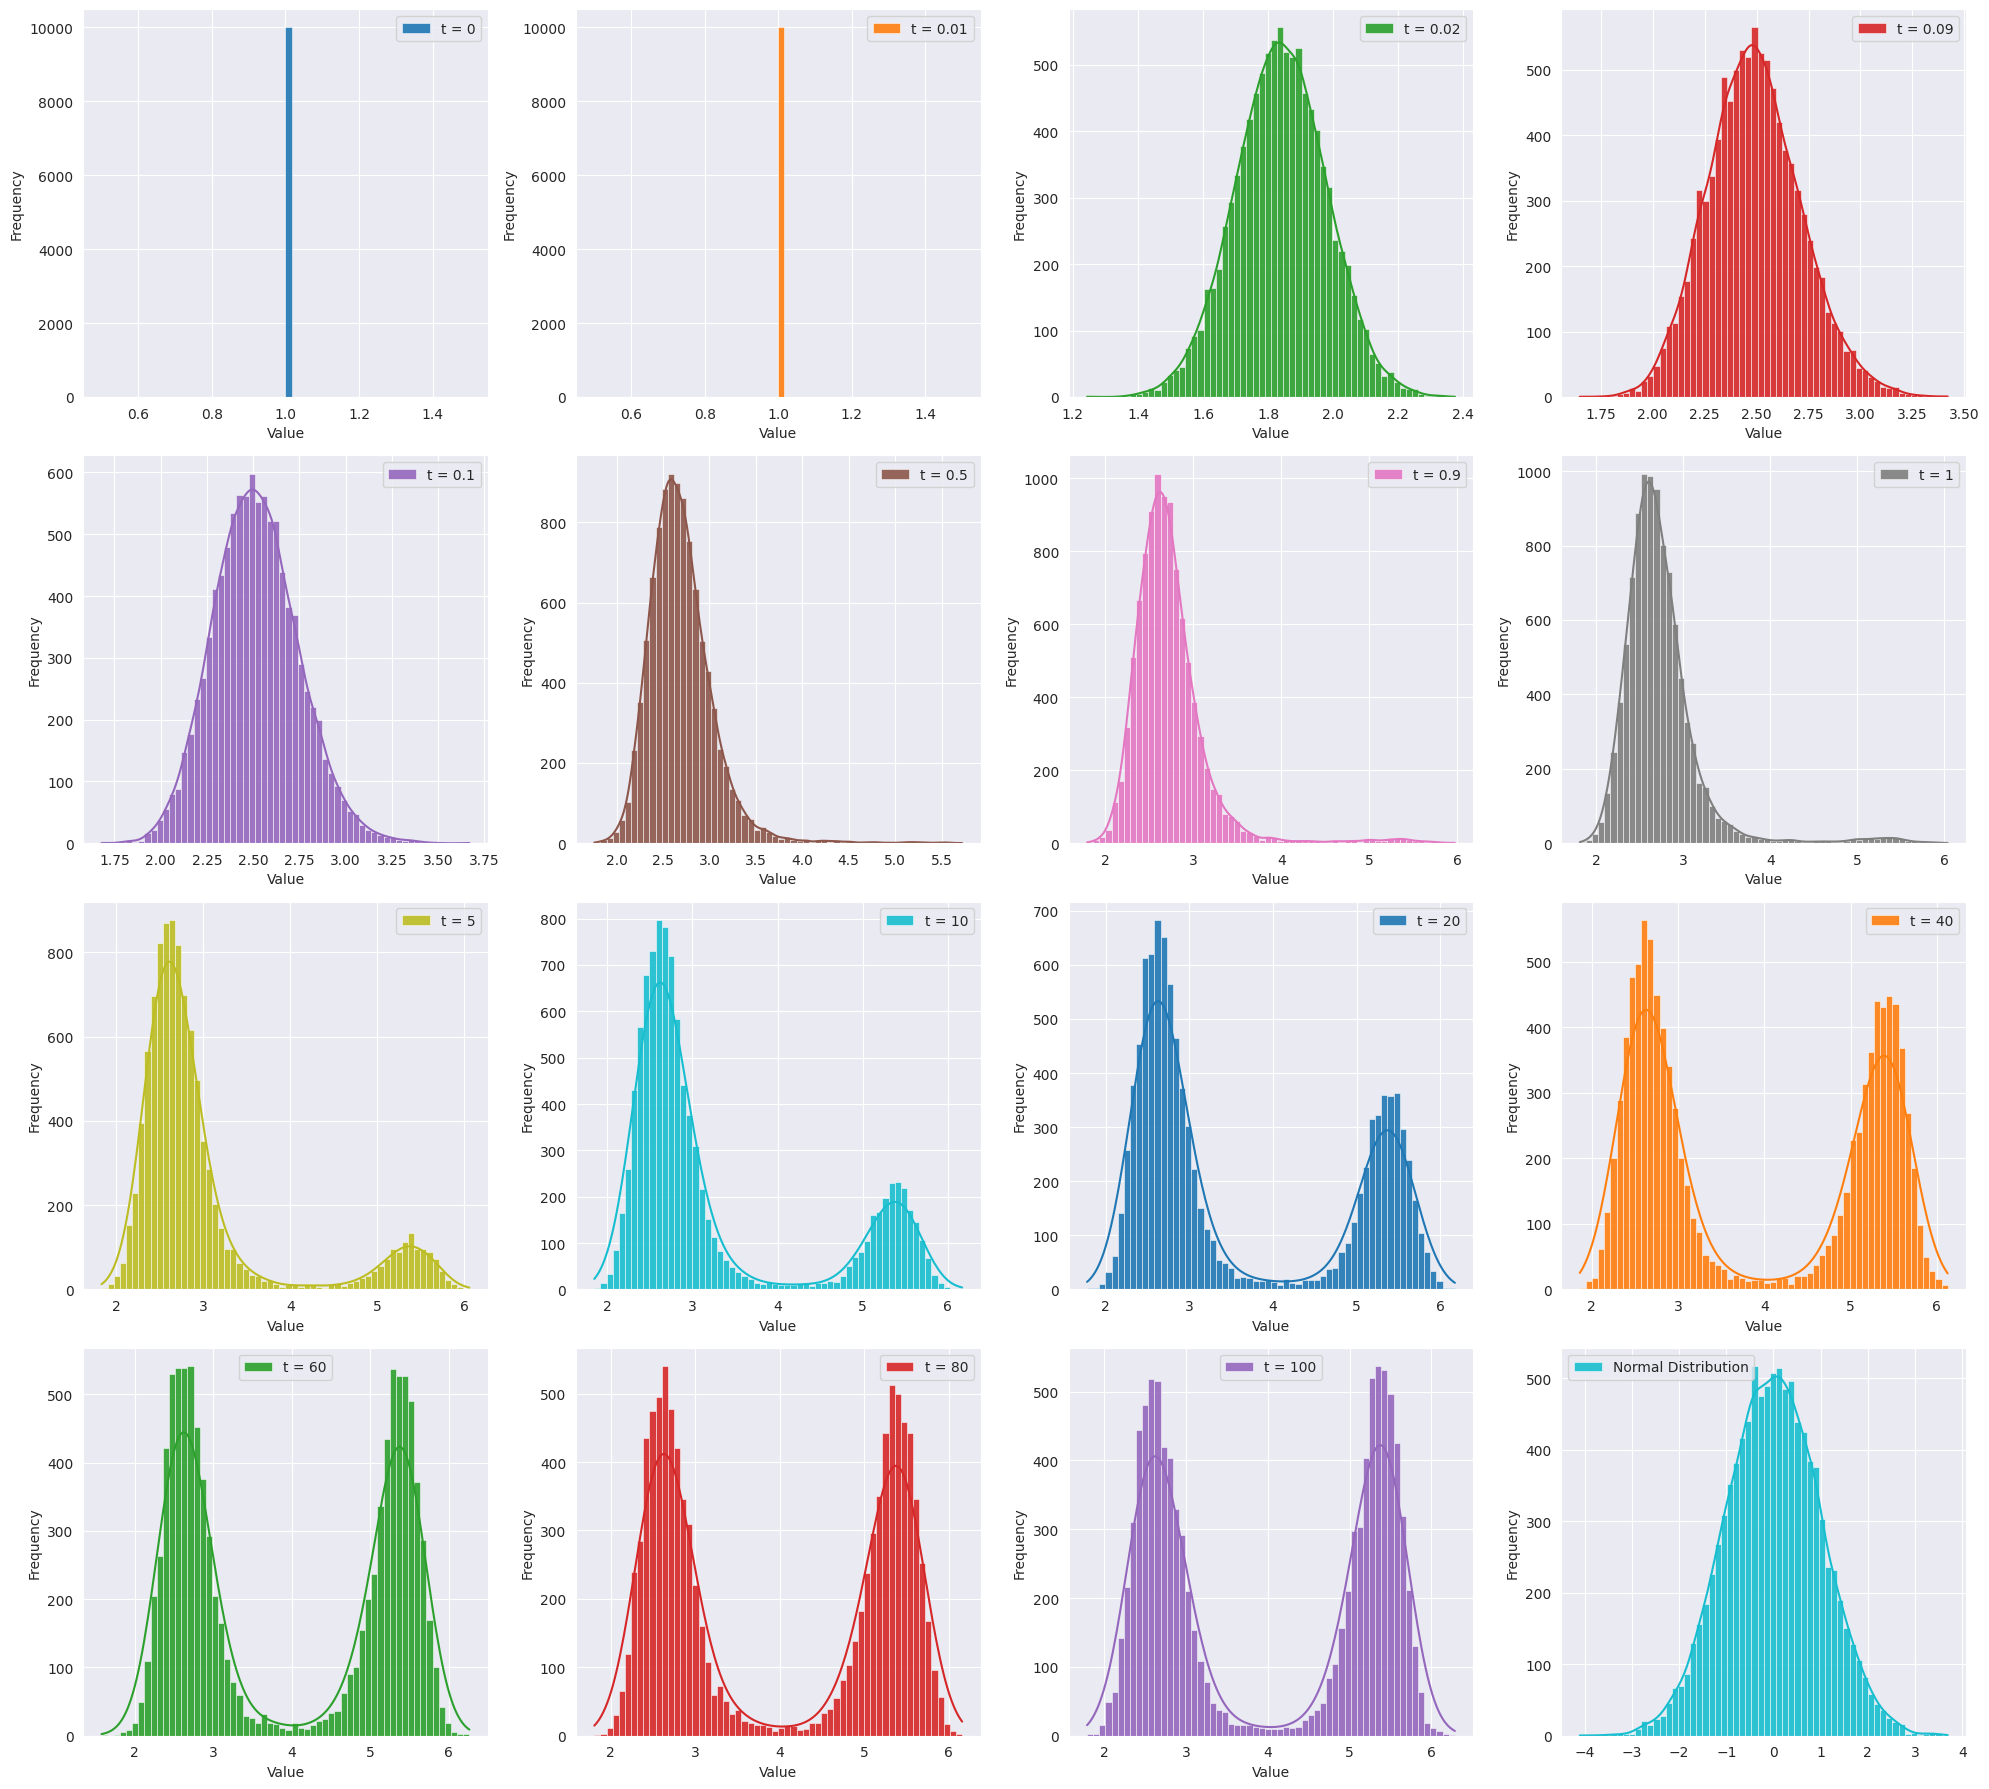

In [87]:
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10,20,40,60,80,100]
hist_plt(time_points, sim_mat,60,alp=0.9)